En este script se realiza la exploración de los datos para conocer el dataset y definir las variables que se usarán en la etapa de modelado. Este proceso implica: 

- Revisión de variables y tipos de datos.
- Revisión de valores nulos, atípicos y duplicados.
- Graficos de distribución, de correlaciones, entre otros.

Ademas, se hace una limpieza inicial de los datos.  

**CARGA DE LIBRERIAS**

In [1]:
import pandas as pd                           #para trabajar datos con dataframes
import numpy as np                            #para trabajar valores del dataframe
import matplotlib.pyplot as plt               #para hacer graficos
import seaborn as sns                         #graficos más profesionales

**CARGA DE DATOS**

In [2]:
dataset_houses_raw= pd.read_csv('num_dataset_houses.csv')
dataset_houses_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278 entries, 0 to 11277
Data columns (total 14 columns):
ano_de_construccion    11278 non-null float64
banos                  11278 non-null float64
disposicion            10066 non-null object
dormitorios            11278 non-null float64
estado                 11243 non-null object
garajes                11278 non-null float64
gastos_comunes         11278 non-null float64
m2_de_la_terraza       11278 non-null float64
m2_del_terreno         11278 non-null float64
m2_edificados          11278 non-null float64
price                  11278 non-null float64
tipo_propiedad         11278 non-null object
vivienda_social        11278 non-null float64
zona                   11232 non-null object
dtypes: float64(10), object(4)
memory usage: 1.2+ MB


In [3]:
dataset_houses_raw.head(3)

,ano_de_construccion,banos,disposicion,dormitorios,estado,garajes,gastos_comunes,m2_de_la_terraza,m2_del_terreno,m2_edificados,price,tipo_propiedad,vivienda_social,zona
0,1991.0,1.0,contrafrente,1.0,excelente estado,0.0,5000.0,0.0,45.0,45.0,150000.0,apartamentos,0.0,punta carretas
1,2007.0,3.0,NaN,3.0,excelente estado,1.0,0.0,0.0,155.0,125.0,329000.0,casas,0.0,pocitos nuevo
2,2012.0,3.0,al frente,4.0,excelente estado,2.0,16000.0,0.0,150.0,150.0,650000.0,apartamentos,0.0,punta carretas


In [4]:
dataset_houses_raw.price.describe()

count    1.127800e+04
mean     2.506128e+05
std      2.124459e+05
min      1.125000e+04
25%      1.300000e+05
50%      1.790000e+05
75%      2.950000e+05
max      3.500000e+06
Name: price, dtype: float64

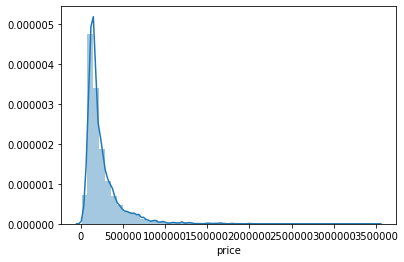

In [5]:
sns.distplot(dataset_houses_raw['price'])

El dataset esta compuesto por 14 variables, la variable que se busca predecir es *price*, es numérica continua y no tiene valores nulos. 

El precio promedio es 250.612 usd (se asum que el precio está en dolares), la casa con el menor precio es de 11.250 usd y la casa de mayor precio es de 3'500.000 usd. 

In [6]:
dataset_houses= dataset_houses_raw.copy(deep=True)

**CONVERSION TIPO DE DATOS**

In [7]:
dataset_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278 entries, 0 to 11277
Data columns (total 14 columns):
ano_de_construccion    11278 non-null float64
banos                  11278 non-null float64
disposicion            10066 non-null object
dormitorios            11278 non-null float64
estado                 11243 non-null object
garajes                11278 non-null float64
gastos_comunes         11278 non-null float64
m2_de_la_terraza       11278 non-null float64
m2_del_terreno         11278 non-null float64
m2_edificados          11278 non-null float64
price                  11278 non-null float64
tipo_propiedad         11278 non-null object
vivienda_social        11278 non-null float64
zona                   11232 non-null object
dtypes: float64(10), object(4)
memory usage: 1.2+ MB


La variable *vivienda_social* debe ser del tipo object

In [8]:
dataset_houses.vivienda_social = dataset_houses.vivienda_social.astype('str')
dataset_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278 entries, 0 to 11277
Data columns (total 14 columns):
ano_de_construccion    11278 non-null float64
banos                  11278 non-null float64
disposicion            10066 non-null object
dormitorios            11278 non-null float64
estado                 11243 non-null object
garajes                11278 non-null float64
gastos_comunes         11278 non-null float64
m2_de_la_terraza       11278 non-null float64
m2_del_terreno         11278 non-null float64
m2_edificados          11278 non-null float64
price                  11278 non-null float64
tipo_propiedad         11278 non-null object
vivienda_social        11278 non-null object
zona                   11232 non-null object
dtypes: float64(9), object(5)
memory usage: 1.2+ MB


**LIMPIEZA DE DATOS**

*Revision y eliminación de valores duplicados*

In [9]:
print('Total de filas en el dataset antes de eliminar valores duplicados: ', len(dataset_houses))
print('Total de filas duplicadas para eliminar: ', dataset_houses.duplicated().sum())
dataset_houses = dataset_houses.drop_duplicates( keep='first')
print('Total de filas en el dataset despues de eliminar valores duplicados: ',len(dataset_houses))

Total de filas en el dataset antes de eliminar valores duplicados:  11278
Total de filas duplicadas para eliminar:  90
Total de filas en el dataset despues de eliminar valores duplicados:  11188


Los datos duplicados no aportan información adicional para el entrenamiento de este modelo, sin embargo si pueden ralentizar el proceso de entrenamiento. En este caso particular son pocos los datos duplicados pero como buena practica se eliminaron. 

*Revisón de valores nulos*

In [10]:
#pocentaje de valores nulos para cada variable que contiene valores nulos
null = dataset_houses.isna().sum()/len(dataset_houses)
null[null > 0].sort_values()

estado         0.003128
zona           0.004112
disposicion    0.107526
dtype: float64

Las variables *estado* y *zona* tienen menos de un 1% de valores nulos, al ser este un valor no significativo se eliminan del dataset las filas con valores nulos para alguna de estas variables.

Por otro lado la variable *disposicion* tiene alrededor de un 10% de valores nulos, eliminar estos valores implicaría perder una decima parte del dataset y no es conveniente. En principio no se hace ninguna modificación sobre esta variable, más adelante se decide que tan significativa parece ser para el modelo y dependiendo de eso se decide si se considera o no la variable y en caso que si, se hará algun tratamiento a los valores nulos.

In [11]:
dataset_houses = dataset_houses.dropna(subset=['estado', 'zona'])
dataset_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11107 entries, 0 to 11277
Data columns (total 14 columns):
ano_de_construccion    11107 non-null float64
banos                  11107 non-null float64
disposicion            9908 non-null object
dormitorios            11107 non-null float64
estado                 11107 non-null object
garajes                11107 non-null float64
gastos_comunes         11107 non-null float64
m2_de_la_terraza       11107 non-null float64
m2_del_terreno         11107 non-null float64
m2_edificados          11107 non-null float64
price                  11107 non-null float64
tipo_propiedad         11107 non-null object
vivienda_social        11107 non-null object
zona                   11107 non-null object
dtypes: float64(9), object(5)
memory usage: 1.3+ MB


*Revisón de valores atípicos*

In [12]:
dataset_houses.describe()

,ano_de_construccion,banos,dormitorios,garajes,gastos_comunes,m2_de_la_terraza,m2_del_terreno,m2_edificados,price
count,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,1.110700e+04
mean,1989.218241,1.648060,2.296210,0.831908,4217.457459,7.487666,133.359008,103.180826,2.501728e+05
std,32.880806,0.760381,1.128015,4.716787,6908.874801,25.223674,150.259648,82.580414,2.114746e+05
min,1060.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.025000,21.000000,1.125000e+04
25%,1965.000000,1.000000,2.000000,0.000000,0.000000,0.000000,54.000000,54.000000,1.300000e+05
50%,1998.000000,1.000000,2.000000,0.000000,1200.000000,0.000000,76.000000,75.000000,1.790000e+05
75%,2017.000000,2.000000,3.000000,1.000000,5000.000000,5.000000,140.000000,123.000000,2.950000e+05
max,2108.000000,3.000000,5.000000,127.000000,56500.000000,597.000000,996.000000,919.000000,3.500000e+06


Las variables:

 - garajes
 - gastos_comunes
 - m2_de_la_terraza
 - m2_del_terreno
 - m2_edificados
 - price

Parecen tener valores atípicos extremos, pues sus valores maximos o minimos distan demasiado del tercer/ primer cuartil. Para corroborarlo, se calcula en cada una de estas variable los valores atípicos extremos y si existen se eliminan.  

In [13]:
print('Total de filas en el dataset antes de la eliminación de algunos valores atípicos:', len(dataset_houses))

Total de filas en el dataset antes de la eliminación de algunos valores atípicos: 11107


Para la eliminación de los valores atípicos se tiene en cuenta el siguiente criterio:
 1. Se calculan los valores extremos(ve) con la definición (ve < Q1-3\*IQR o  ve > Q3+3\*IQR )
 2. Si el porcentaje de valores extremos es menor a 1% respecto al total de elementos del dataframe, entonces se eliminan.
 3. Si el porcentaje de valores extremos es mayor a 1% se itera *n* para redefinir los ve (ve < Q1-*n*\*IQR o  ve > Q3+*n*\*IQR ) y se busca *n* tal que con sean aproximadamente menores al 1% de los elmentos del dataset y con esta nueva definición se eliminan.

**garajes**

In [14]:
Q1  = dataset_houses.garajes.quantile([.25]).values[0]
Q3  = dataset_houses.garajes.quantile([.75]).values[0]
IQR = Q3 -Q1
(len(dataset_houses[(dataset_houses['garajes'] >= (Q1-3*IQR)) & (dataset_houses['garajes'] <= (Q3+3*IQR))])/(len(dataset_houses)))*100

99.72089673179076

Si se eliminan los valores atípicos extremenos para la variable garaje aun se mantiene el 99.72% de los datos, entonces es conveniente eliminarlos

In [15]:
dataset_houses = dataset_houses[(dataset_houses['garajes'] >= (Q1-3*IQR)) & (dataset_houses['garajes'] <= (Q3+3*IQR))]

**gastos comunes**

In [16]:
Q1  = dataset_houses.gastos_comunes.quantile([.25]).values[0]
Q3  = dataset_houses.gastos_comunes.quantile([.75]).values[0]
IQR = Q3 -Q1
(len(dataset_houses[(dataset_houses['gastos_comunes'] >= (Q1-3*IQR)) & (dataset_houses['gastos_comunes'] <= (Q3+3*IQR))])/(len(dataset_houses)))*100

95.93716143011918

In [17]:
(len(dataset_houses[(dataset_houses['gastos_comunes'] >= (Q1-4*IQR)) & (dataset_houses['gastos_comunes'] <= (Q3+4*IQR))])/(len(dataset_houses)))*100

97.79703864210907

In [18]:
(len(dataset_houses[(dataset_houses['gastos_comunes'] >= (Q1-5*IQR)) & (dataset_houses['gastos_comunes'] <= (Q3+5*IQR))])/(len(dataset_houses)))*100

98.88949079089923

In [19]:
dataset_houses = dataset_houses[(dataset_houses['gastos_comunes'] >= (Q1-5*IQR)) & (dataset_houses['gastos_comunes'] <= (Q3+5*IQR))]

**m2 terraza**

In [20]:
Q1  = dataset_houses.m2_de_la_terraza.quantile([.25]).values[0]
Q3  = dataset_houses.m2_de_la_terraza.quantile([.75]).values[0]
IQR = Q3 -Q1
(len(dataset_houses[(dataset_houses['m2_de_la_terraza'] >= (Q1-3*IQR)) & (dataset_houses['m2_de_la_terraza'] <= (Q3+3*IQR))])/(len(dataset_houses)))*100

91.79220304939287

In [21]:
(len(dataset_houses[(dataset_houses['m2_de_la_terraza'] >= (Q1-20*IQR)) & (dataset_houses['m2_de_la_terraza'] <= (Q3+20*IQR))])/(len(dataset_houses)))*100

98.95918926321555

In [22]:
dataset_houses = dataset_houses[(dataset_houses['m2_de_la_terraza'] >= (Q1-20*IQR)) & (dataset_houses['m2_de_la_terraza'] <= (Q3+20*IQR))]

**m2 terreno**

In [23]:
Q1  = dataset_houses.m2_del_terreno.quantile([.25]).values[0]
Q3  = dataset_houses.m2_del_terreno.quantile([.75]).values[0]
IQR = Q3 -Q1
(len(dataset_houses[(dataset_houses['m2_del_terreno'] >= (Q1-3*IQR)) & (dataset_houses['m2_del_terreno'] <= (Q3+3*IQR))])/(len(dataset_houses)))*100

92.63769720453917

In [24]:
(len(dataset_houses[(dataset_houses['m2_del_terreno'] >= (Q1-8*IQR)) & (dataset_houses['m2_del_terreno'] <= (Q3+8*IQR))])/(len(dataset_houses)))*100

98.71759387397361

In [25]:
dataset_houses = dataset_houses[(dataset_houses['m2_del_terreno'] >= (Q1-8*IQR)) & (dataset_houses['m2_del_terreno'] <= (Q3+8*IQR))]

**m2 edificados**

In [26]:
Q1  = dataset_houses.m2_edificados.quantile([.25]).values[0]
Q3  = dataset_houses.m2_edificados.quantile([.75]).values[0]
IQR = Q3 -Q1
(len(dataset_houses[(dataset_houses['m2_edificados'] >= (Q1-3*IQR)) & (dataset_houses['m2_edificados'] <= (Q3+3*IQR))])/(len(dataset_houses)))*100

97.93457943925233

In [27]:
(len(dataset_houses[(dataset_houses['m2_edificados'] >= (Q1-4*IQR)) & (dataset_houses['m2_edificados'] <= (Q3+4*IQR))])/(len(dataset_houses)))*100

98.79439252336448

In [28]:
dataset_houses = dataset_houses[(dataset_houses['m2_edificados'] >= (Q1-4*IQR)) & (dataset_houses['m2_edificados'] <= (Q3+4*IQR))]

**price**

In [29]:
Q1  = dataset_houses.price.quantile([.25]).values[0]
Q3  = dataset_houses.price.quantile([.75]).values[0]
IQR = Q3 -Q1
(len(dataset_houses[(dataset_houses['price'] >= (Q1-3*IQR)) & (dataset_houses['price'] <= (Q3+3*IQR))])/(len(dataset_houses)))*100

97.98505344811275

In [30]:
(len(dataset_houses[(dataset_houses['price'] >= (Q1-4*IQR)) & (dataset_houses['price'] <= (Q3+4*IQR))])/(len(dataset_houses)))*100

99.0350960174061

In [31]:
dataset_houses = dataset_houses[(dataset_houses['price'] >= (Q1-4*IQR)) & (dataset_houses['price'] <= (Q3+4*IQR))]

In [32]:
print('Total de filas en el dataset antes de la eliminación de algunos valores atípicos:', len(dataset_houses))

Total de filas en el dataset antes de la eliminación de algunos valores atípicos: 10469


In [33]:
11107-10469

638

De 11.107 datos antes de la limpieza de valores atípicos, se eliminaron 638 datos. Si bien no se eliminaron en todo caso todos los valores extremos pues esto implicaba perder una gran parte del dataset, está pequeña limpieza garantiza mejor calidad de los datos para el entrenamiento de los modelos.

**describe variables numericas**

In [34]:
dataset_houses.describe()

,ano_de_construccion,banos,dormitorios,garajes,gastos_comunes,m2_de_la_terraza,m2_del_terreno,m2_edificados,price
count,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000
mean,1989.381603,1.591556,2.224186,0.587449,3851.217213,5.342891,116.040795,91.615095,220009.488108
std,33.058185,0.725609,1.094278,0.751968,5837.949477,13.047573,117.418855,57.978318,140675.711866
min,1060.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.090000,21.000000,11250.000000
25%,1965.000000,1.000000,2.000000,0.000000,0.000000,0.000000,53.000000,53.000000,129000.000000
50%,1999.000000,1.000000,2.000000,0.000000,1500.000000,0.000000,73.000000,72.000000,170000.000000
75%,2017.000000,2.000000,3.000000,1.000000,5000.000000,5.000000,124.000000,112.000000,270000.000000
max,2108.000000,3.000000,5.000000,4.000000,30000.000000,105.000000,760.000000,378.000000,850000.000000


**describe variables categoricas**

In [35]:
dataset_houses.describe(include=[np.object])

,disposicion,estado,tipo_propiedad,vivienda_social,zona
count,9354,10469,10469,10469,10469
unique,4,7,2,2,78
top,al frente,buen estado,apartamentos,0.0,pocitos
freq,7684,3861,8056,9513,1840


In [36]:
dataset_houses.vivienda_social.unique()

array(['0.0', '1.0'], dtype=object)

In [37]:
dataset_houses.tipo_propiedad.unique()

array(['apartamentos', 'casas'], dtype=object)

Por ultimo, considerando que la variable *tipo_propiedad* solo tiene dos posibles valores (['apartamentos', 'casas']), se hace una conversión de la columna tal que:
 - si la propiedad es apartamento el valor es 1
 - si la propiedad es casa el valor es 0

In [38]:
def tipo_apartament(row):
    if row['tipo_propiedad'] == 'apartamentos':
        value= 1
    else:
        value=0
    return value

In [39]:
dataset_houses['tipo_propiedad_apartamento'] = dataset_houses.apply(tipo_apartament ,axis=1)
dataset_houses.head(5)

,ano_de_construccion,banos,disposicion,dormitorios,estado,garajes,gastos_comunes,m2_de_la_terraza,m2_del_terreno,m2_edificados,price,tipo_propiedad,vivienda_social,zona,tipo_propiedad_apartamento
0,1991.0,1.0,contrafrente,1.0,excelente estado,0.0,5000.0,0.0,45.0,45.0,150000.0,apartamentos,0.0,punta carretas,1
1,2007.0,3.0,NaN,3.0,excelente estado,1.0,0.0,0.0,155.0,125.0,329000.0,casas,0.0,pocitos nuevo,0
2,2012.0,3.0,al frente,4.0,excelente estado,2.0,16000.0,0.0,150.0,150.0,650000.0,apartamentos,0.0,punta carretas,1
3,2015.0,1.0,lateral,1.0,excelente estado,1.0,6000.0,0.0,59.0,59.0,273000.0,apartamentos,0.0,buceo,1
4,2019.0,1.0,NaN,1.0,buen estado,0.0,0.0,0.0,35.0,35.0,160000.0,apartamentos,0.0,pocitos,1


In [40]:
dataset_houses.groupby('tipo_propiedad').size()

tipo_propiedad
apartamentos    8056
casas           2413
dtype: int64

In [41]:
dataset_houses.groupby('tipo_propiedad_apartamento').size()

tipo_propiedad_apartamento
0    2413
1    8056
dtype: int64

**ANALISIS DESCRIPTIVO DE LOS DATOS**

1. VARIABLE NUMÉRICAS Y CATEGORICAS DE 2 VALORES

El siguiente gráfico muetra la correlación de a pares para todas las variables numéricas y las categoricas *vivienda_social* y *tipo_propiedad_apartamento*. 
La idea en este gráfico es ver en la digonales los histogramas de cada variables y ademas ver para cada variable la correlación con *price*.

De estos graficos más la matriz de correlación se descartan algunas variables a considerar para el modelo.

*Diagramas de disperción e histogramas*

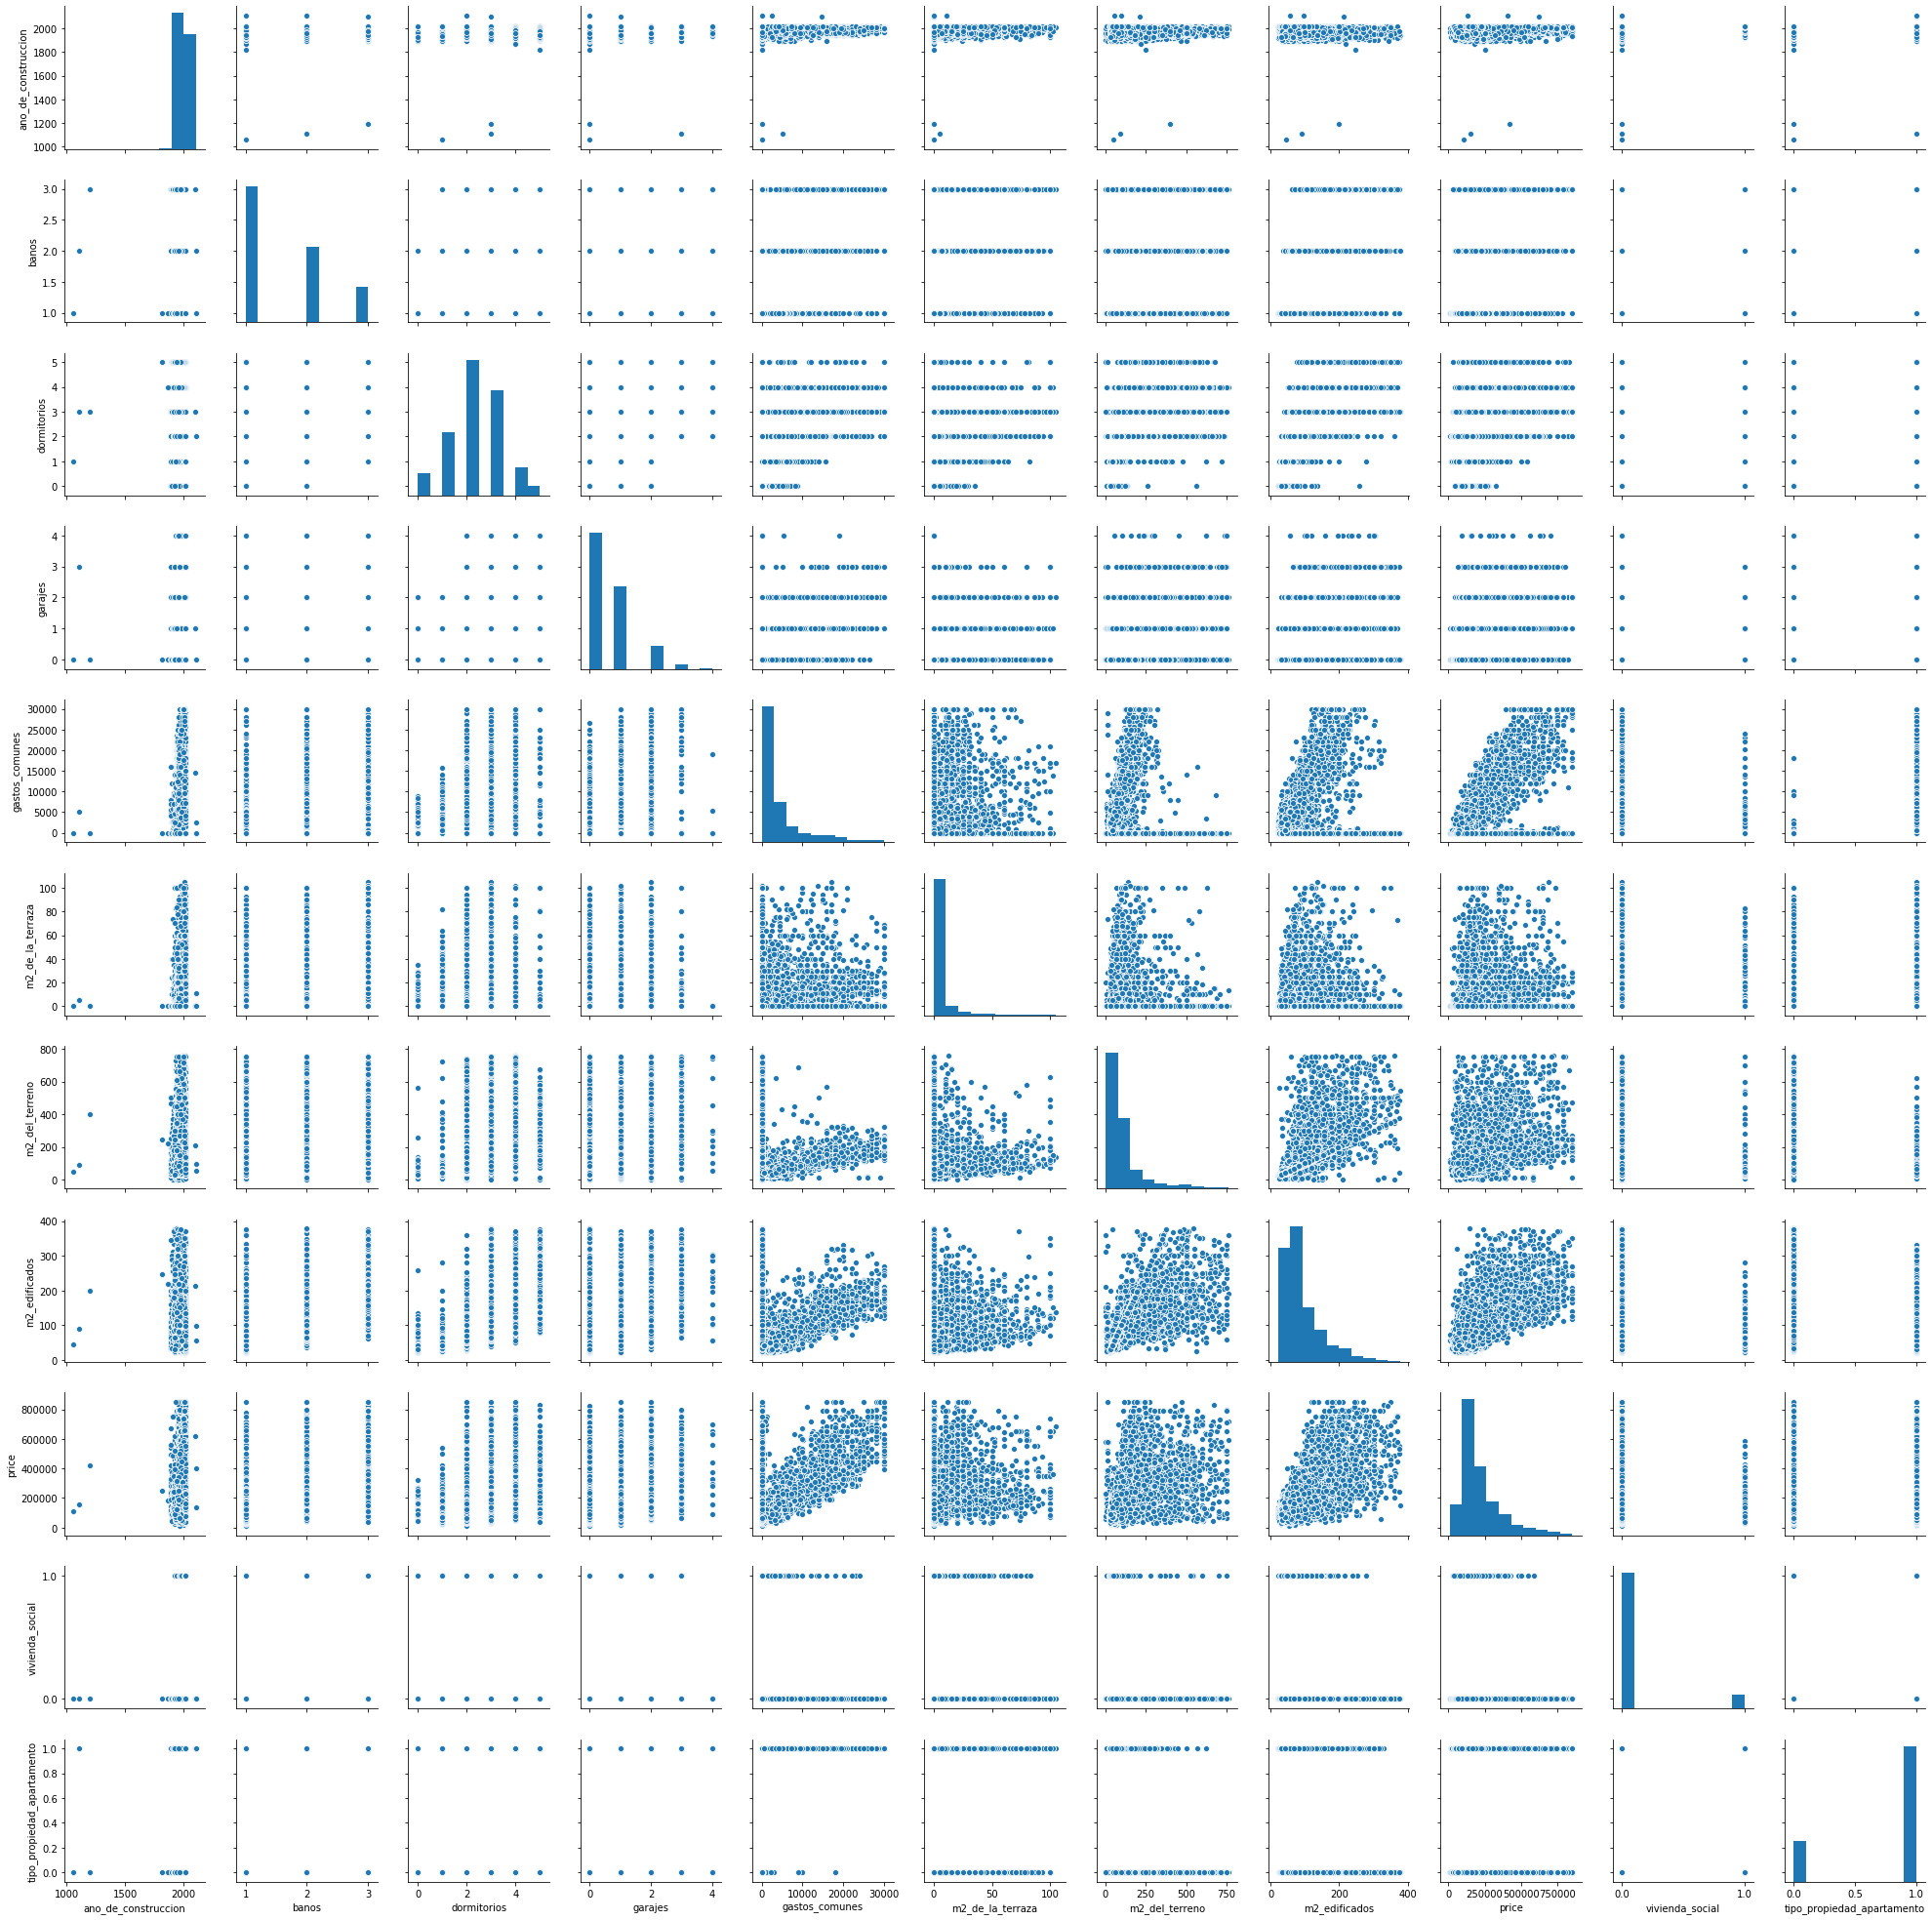

In [42]:
sns.pairplot(dataset_houses)

Se puede visulizar que las variables que mejor correlacionan con el precio son:
 - dormitorios
 - gastos_comunes
 - m2_del_terreno
 - m2_edificados
 - vivienda_social
  

*Matriz de correlación*

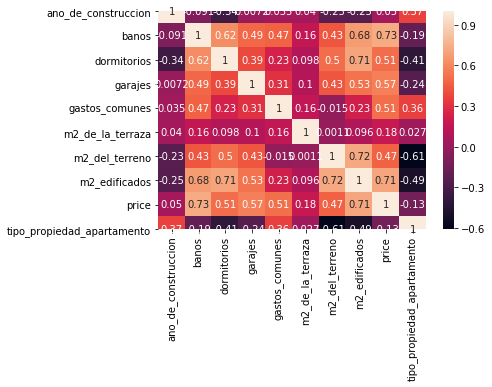

In [43]:
sns.heatmap(dataset_houses.corr(), annot=True)

Se verifican las hipotesis anteriores, además se ve una correlación significativa de *price* con las variables: 
 - banos
 - garajes

Por tanto algunas de las variables del dataset no se tendrán en cuenta en el modelo para simplificar resultados, por ahora se descartan las variables:
 - ano_de_construccion
 - m2_de_la_terraza
 - tipo_propiedad_apartamento

In [44]:
dataset_houses = dataset_houses.drop(columns=['ano_de_construccion', 'm2_de_la_terraza', 'tipo_propiedad_apartamento', 'tipo_propiedad'])
dataset_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10469 entries, 0 to 11277
Data columns (total 11 columns):
banos              10469 non-null float64
disposicion        9354 non-null object
dormitorios        10469 non-null float64
estado             10469 non-null object
garajes            10469 non-null float64
gastos_comunes     10469 non-null float64
m2_del_terreno     10469 non-null float64
m2_edificados      10469 non-null float64
price              10469 non-null float64
vivienda_social    10469 non-null object
zona               10469 non-null object
dtypes: float64(7), object(4)
memory usage: 1.3+ MB


2. VARIABLE CATEGORICAS DE MÁS DE 2 VALORES

**disposicion**

Text(0, 0.5, 'disposicion')

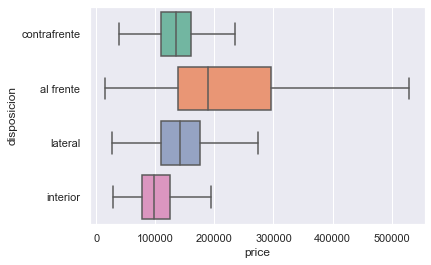

In [45]:
sns.set(style="darkgrid")
sns.boxplot(x='price', y='disposicion', data = dataset_houses, palette="Set2", showfliers = False)
plt.xlabel('price')
plt.ylabel('disposicion')

**estado**

Text(0, 0.5, 'estado')

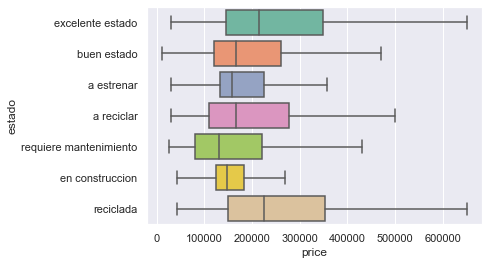

In [46]:
sns.boxplot( x='price', y='estado',data = dataset_houses,  palette="Set2", showfliers = False)
plt.xlabel('price')
plt.ylabel('estado')

**zona**

In [47]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
price_zona = dataset_houses[['zona','price']].groupby('zona').mean().sort_values(by='price')
price_zona

,price
zona,
villa garcia manga rural,45000.000000
jardines del hipodromo,68833.333333
ituzaingo,69125.000000
las acacias,71000.000000
punta rieles,72200.000000
piedras blancas,73828.125000
camino maldonado,76812.500000
flor de maronas,77464.285714
conciliacion,84222.222222


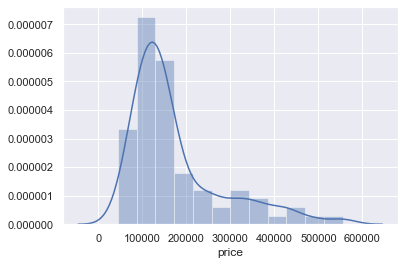

In [48]:
sns.distplot(price_zona['price'])

In [49]:
price_zona.describe()

,price
count,78.000000
mean,175342.108775
std,107465.833716
min,45000.000000
25%,104406.250000
50%,138250.000000
75%,196250.035289
max,554700.321429


**Análisis:**
Las tres variables categoricas *disposicion*, *estado* y *zona* muestran correlacion para ciertas categorias con el precio. Por ejemplo:
- Para *disposición*, cuando el valor es 'al frente' el promedio del precio es más alto, y cuando es 'interior' el precio más bajo.
- Para *estado*, cuando el valor es 'reciclada' y 'excelente estado', los precios son mas altos.
- Por ultimo al analizar *zona* son 78 posibles categorias y cada una de ellas tiene un valor promedio distinto.

Como las variables categoricas no pueden ser consideradas sin tratamiento previo en un modelo tipo regresion estos datos deben ser procesados. Además, para entrenar modelos del tipo regresión que predigan el precio, es importante que todos los predictores sean, variables enteras o variables dummies. 

Por tanto se crean nuevas columnas que recojan la información más relevantes de estas categorias, siguiendo la lógica:
- disposición_frente será 1 si el valor de disposición es 'al frente' y 0 para los otros posibles valores.
- estado_rec_exc será 1 si *estado* es 'reciclada' o 'excelente estado' y 0 para los otros posibles valores.
- zona_cat será '1' si el promedio de precio para la zona es < 104407 , '2' si el promedio de precio para la zona es >= 104407 y <= 196251, por ultimo '3' si  el promedio de precio para la zona es > 196251. Los valores 104407 y 196251 corresponden al Q1 y Q3 respectivamente.

**disposicion**

In [50]:
dataset_houses.disposicion.unique()

array(['contrafrente', nan, 'al frente', 'lateral', 'interior'],
      dtype=object)

In [51]:
dataset_houses.groupby('disposicion'). size()

disposicion
al frente       7684
contrafrente    1016
interior         357
lateral          297
dtype: int64

In [52]:
def disp_fre(row):
    if row['disposicion'] == 'al frente':
        value= 1
    else:
        value=0
    return value 

In [53]:
dataset_houses['disposición_frente'] = dataset_houses.apply(disp_fre, axis=1) 
dataset_houses.groupby('disposición_frente'). size()

disposición_frente
0    2785
1    7684
dtype: int64

**estado**

In [54]:
dataset_houses.estado.unique()

array(['excelente estado', 'buen estado', 'a estrenar', 'a reciclar',
       'requiere mantenimiento', 'en construccion', 'reciclada'],
      dtype=object)

In [55]:
dataset_houses.groupby('estado'). size()

estado
a estrenar                1717
a reciclar                 320
buen estado               3861
en construccion            823
excelente estado          3126
reciclada                  290
requiere mantenimiento     332
dtype: int64

In [56]:
def est_rec_exc(row):
    if row['estado'] == 'excelente estado' or row['estado'] == 'reciclada' :
        value= 1
    else:
        value=0
    return value 

In [57]:
dataset_houses['estado_rec_exc'] = dataset_houses.apply(est_rec_exc, axis=1) 
dataset_houses.groupby('estado_rec_exc'). size()

estado_rec_exc
0    7053
1    3416
dtype: int64

**zona**

In [58]:
zona_1 = price_zona[price_zona.price < 104407].index.tolist()
zona_1

['villa garcia manga rural',
 'jardines del hipodromo',
 'ituzaingo',
 'las acacias',
 'punta rieles',
 'piedras blancas',
 'camino maldonado',
 'flor de maronas',
 'conciliacion',
 'la teja',
 'maronas',
 'lezica',
 'nuevo paris',
 'cerro',
 'malvin norte',
 'cerrito',
 'colon',
 'capurro',
 'belvedere',
 'villa espanola']

In [59]:
zona_2 = price_zona[(price_zona.price >= 104407) & (price_zona.price <= 196251)].index.tolist()
zona_2

['penarol',
 'bolivar',
 'aires puros',
 'mercado modelo',
 'paso molino',
 'larranaga',
 'penarol lavalleja',
 'manga',
 'union',
 'shangrila',
 'villa munoz',
 'la comercial',
 'bella vista',
 'aguada',
 'sayago',
 'goes',
 'arroyo seco',
 'reducto',
 'prado nueva savona',
 'capurro bella vista',
 'bella italia',
 'ciudad vieja',
 'paso de la arena',
 'brazo oriental',
 'tres cruces',
 'la figurita',
 'cordon',
 'villa argentina',
 'villa dolores',
 'centro',
 'perez castellanos',
 'jacinto vera',
 'la blanqueada',
 'palermo',
 'parque rodo',
 'barrio sur',
 'prado',
 'parque batlle']

In [60]:
zona_3 = price_zona[price_zona.price > 196251].index.tolist()
zona_3

['buceo',
 'atahualpa',
 'la colorada',
 'montevideo',
 'malvin',
 'pocitos nuevo',
 'pocitos',
 'carrasco norte',
 'barra de carrasco',
 'punta carretas',
 'villa biarritz',
 'carrasco este',
 'parque miramar',
 'puerto buceo',
 'banados de carrasco',
 'punta gorda',
 'la caleta',
 'carrasco',
 'golf',
 'carrasco - barrios con seguridad']

In [61]:
len(zona_1) + len(zona_2) + len(zona_3) 

78

In [62]:
len(dataset_houses.zona.unique())

78

In [63]:
def zona_cat(row):
    if row['zona'] in zona_1:
        value = '1'
    elif row['zona'] in zona_2:
        value = '2'
    elif row['zona'] in zona_3:
        value = '3'
    else:
        value ='error'
    return value 

In [64]:
dataset_houses['zona_cat'] = dataset_houses.apply(zona_cat, axis=1) 
dataset_houses.groupby('zona_cat'). size()

zona_cat
1     454
2    4928
3    5087
dtype: int64

In [65]:
dataset_houses.head(15)

,banos,disposicion,dormitorios,estado,garajes,gastos_comunes,m2_del_terreno,m2_edificados,price,vivienda_social,zona,disposición_frente,estado_rec_exc,zona_cat
0,1.0,contrafrente,1.0,excelente estado,0.0,5000.0,45.0,45.0,150000.0,0.0,punta carretas,0,1,3
1,3.0,NaN,3.0,excelente estado,1.0,0.0,155.0,125.0,329000.0,0.0,pocitos nuevo,0,1,3
2,3.0,al frente,4.0,excelente estado,2.0,16000.0,150.0,150.0,650000.0,0.0,punta carretas,1,1,3
3,1.0,lateral,1.0,excelente estado,1.0,6000.0,59.0,59.0,273000.0,0.0,buceo,0,1,3
4,1.0,NaN,1.0,buen estado,0.0,0.0,35.0,35.0,160000.0,0.0,pocitos,0,0,3
5,1.0,al frente,2.0,buen estado,0.0,0.0,55.0,55.0,64000.0,0.0,parque batlle,1,0,2
6,1.0,al frente,1.0,a estrenar,1.0,2500.0,52.0,52.0,130000.0,1.0,la blanqueada,1,0,2
7,2.0,al frente,2.0,buen estado,1.0,0.0,599.0,140.0,198000.0,0.0,malvin norte,1,0,1
8,3.0,NaN,3.0,buen estado,1.0,6000.0,166.0,166.0,198000.0,0.0,centro,0,0,2
9,3.0,al frente,4.0,excelente estado,2.0,0.0,500.0,278.0,495000.0,0.0,parque miramar,1,1,3


In [66]:
dataset_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10469 entries, 0 to 11277
Data columns (total 14 columns):
banos                 10469 non-null float64
disposicion           9354 non-null object
dormitorios           10469 non-null float64
estado                10469 non-null object
garajes               10469 non-null float64
gastos_comunes        10469 non-null float64
m2_del_terreno        10469 non-null float64
m2_edificados         10469 non-null float64
price                 10469 non-null float64
vivienda_social       10469 non-null object
zona                  10469 non-null object
disposición_frente    10469 non-null int64
estado_rec_exc        10469 non-null int64
zona_cat              10469 non-null object
dtypes: float64(7), int64(2), object(5)
memory usage: 1.5+ MB


**se eliminan columnas innecesarias para el modelado**

In [67]:
dataset_houses = dataset_houses.drop(columns=['disposicion', 'estado', 'zona'])
dataset_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10469 entries, 0 to 11277
Data columns (total 11 columns):
banos                 10469 non-null float64
dormitorios           10469 non-null float64
garajes               10469 non-null float64
gastos_comunes        10469 non-null float64
m2_del_terreno        10469 non-null float64
m2_edificados         10469 non-null float64
price                 10469 non-null float64
vivienda_social       10469 non-null object
disposición_frente    10469 non-null int64
estado_rec_exc        10469 non-null int64
zona_cat              10469 non-null object
dtypes: float64(7), int64(2), object(2)
memory usage: 1.3+ MB


**Conversión de la variable zona_cat en variable tipo dummy**

In [68]:
dataset_houses= pd.get_dummies(dataset_houses, columns=['zona_cat'])

In [69]:
dataset_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10469 entries, 0 to 11277
Data columns (total 13 columns):
banos                 10469 non-null float64
dormitorios           10469 non-null float64
garajes               10469 non-null float64
gastos_comunes        10469 non-null float64
m2_del_terreno        10469 non-null float64
m2_edificados         10469 non-null float64
price                 10469 non-null float64
vivienda_social       10469 non-null object
disposición_frente    10469 non-null int64
estado_rec_exc        10469 non-null int64
zona_cat_1            10469 non-null uint8
zona_cat_2            10469 non-null uint8
zona_cat_3            10469 non-null uint8
dtypes: float64(7), int64(2), object(1), uint8(3)
memory usage: 1.2+ MB


**descarga de los datos listo para trabajar en el desarrollo del modelo**

In [70]:
#dataset_houses.to_csv(r'C:\Users\daniela.vargas\Documents\Data science project\dataset_houses_model.csv', index = False)